**This tutorial explores the temporal dynamics of solar energy production using real-world data from photovoltaic plants in Alabama. In complex systems, emergent behavior arises from interactions between many components. Solar energy production is largely variable due to environmental, infrastructural, and systemic factors, making it a suitable for complex system analysis (Mitchell, 2009).This report has a focus on temporal signatures present in the data and examines the stationarity of these signatures. Additionally, we take a look at the variability of the data and we hypothesize about the role of the solar cycle in the energy production.**

This report tries to answer the following questions:
1. Can we assign an Order of Change to the Temporal Signature of the solar power production of Alabama's power plants?
2. What can we say about the Stationarity of the dataset?
3. Did we account for variability (measurement error, random walk or perturbations)?


# Time Evolution and Emergence

**Complex science** studies how a large collection of components that are locally interacting with each other at small scales, can spontenously self-organize and exhibit global structures and behaviors at larger scales (Mitchell, 2009; Holland, 1992). This is also called **emergence**, complex patterns or behaviors that arise from simple parts interacting as part of a system. 
Here, we'll look at how **time evolution** relates to emergence in complex systems, or in simpler terms **how systems changes over time.** (De Domenico, z.d.)

Why do we look at time evolution, when we can also just look at the single components of the system? This is the reductionistic view of trying to understand a system, by breaking it down into its parts. While this approach works well in areas such as classical physics, in complex science it is the interaction between the parts that is significant. Watching how the system evolves over time can reveal the **emergent behavior** that is not obvious by looking just at its parts. Simulations are great tools to observe systems under different conditions. These models can be agent based (to see how they interact with each other) or equation-based (tiny changed in initial conditions lead to great differences later, like the butterfly effect).

**Solar Energy Production Hypothesis**
We will research whether the data of solar plants of the Alabama dataset show emergence. We hypothesize that the solar energy system exhibits regular periodic behavior, which aligns with second-order temporal signatures, although it will not exhibit strong emergence in the sense of novel, system-level behavior arising from internal interactions. The production may match the sun's cycle, specifically a daily cycle of more production during the day and less to none at night. Over longer periods we expect to see a seasonal trend, since days in the summer have more and longer sunlight and better weather conditions (Box, Jenkins, & Reinsel, 2008).




# The Data

The dataset includes the solar power production of 137 photovoltaic plants in Alabama, USA. The power is recorded in values of kW each 15 minutes from the first of January 2011 till the first of January 2015. However, some power plants were built after 2011, so in these cases the consumption is considered 0. Each day has 96 (24 * 4) measurement points, instances where the clock is changed (March and October) are accounted for with zero values, or combined consumption.

Each power plant has their own time series, but all with the same sampling frequencies. The datetime has the format ‘yyyy-mm-dd hh:mm:ss’, the kW values are represented with floats and the power plants are labeled MT_001, MT_002, etc.


In [1]:
# Downloading of the dataset
import pandas as pd

df = pd.read_csv(r"C:\Users\welmo\JupyterNotebooks\Complex Systems\LD2011_2014.txt", sep=';', engine='python', quotechar='"')

df.head()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
1,2011-01-01 00:30:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2,2011-01-01 00:45:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
3,2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
4,2011-01-01 01:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


# Preprocessing

Preprocessing ensures that timestamps are correctly parsed and power values are accurately treated as numerical types, allowing for time-series analysis and plotting.

In [2]:
# Parsing the dataset
df.rename(columns={df.columns[0]: "datetime"}, inplace=True)
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Convert values
df.dtypes.head()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.').astype(float)
        
df.dtypes.head()

#Preprocessed dataset
df.head()


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Temporal Dynamics and Change

This change over time, known as temporal change, can be identified as a pattern referred to as a temporal signature. These signatures can be categorized by their level of complexity, or order of change. A first-order change is the simplest, typically exhibiting linear or polynomial trends that can be modeled using a single equation. A second-order change involves oscillatory behavior—such as periodic cycles or fluctuations with varying frequency—which requires more advanced modeling techniques. Finally, a third-order change reflects chaotic dynamics (deterministic chaos) and is highly sensitive to initial conditions. Even when the underlying equations are known, accurately modeling such systems becomes extremely challenging.

We will examine solar energy production over several time scales: five years, one year, one month, one week, and one day. To explore these dynamics, we compare the output of a single solar plant to that of a group of seven plants. This number was choosen as it did not clutter the plot too much to detect temporal patterns clearly, while fewer plants may not reveal the presence of the patterns.

C:\Users\welmo\AppData\Local\Temp\ipykernel_8488\1572715461.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # Clean, high-contrast visuals


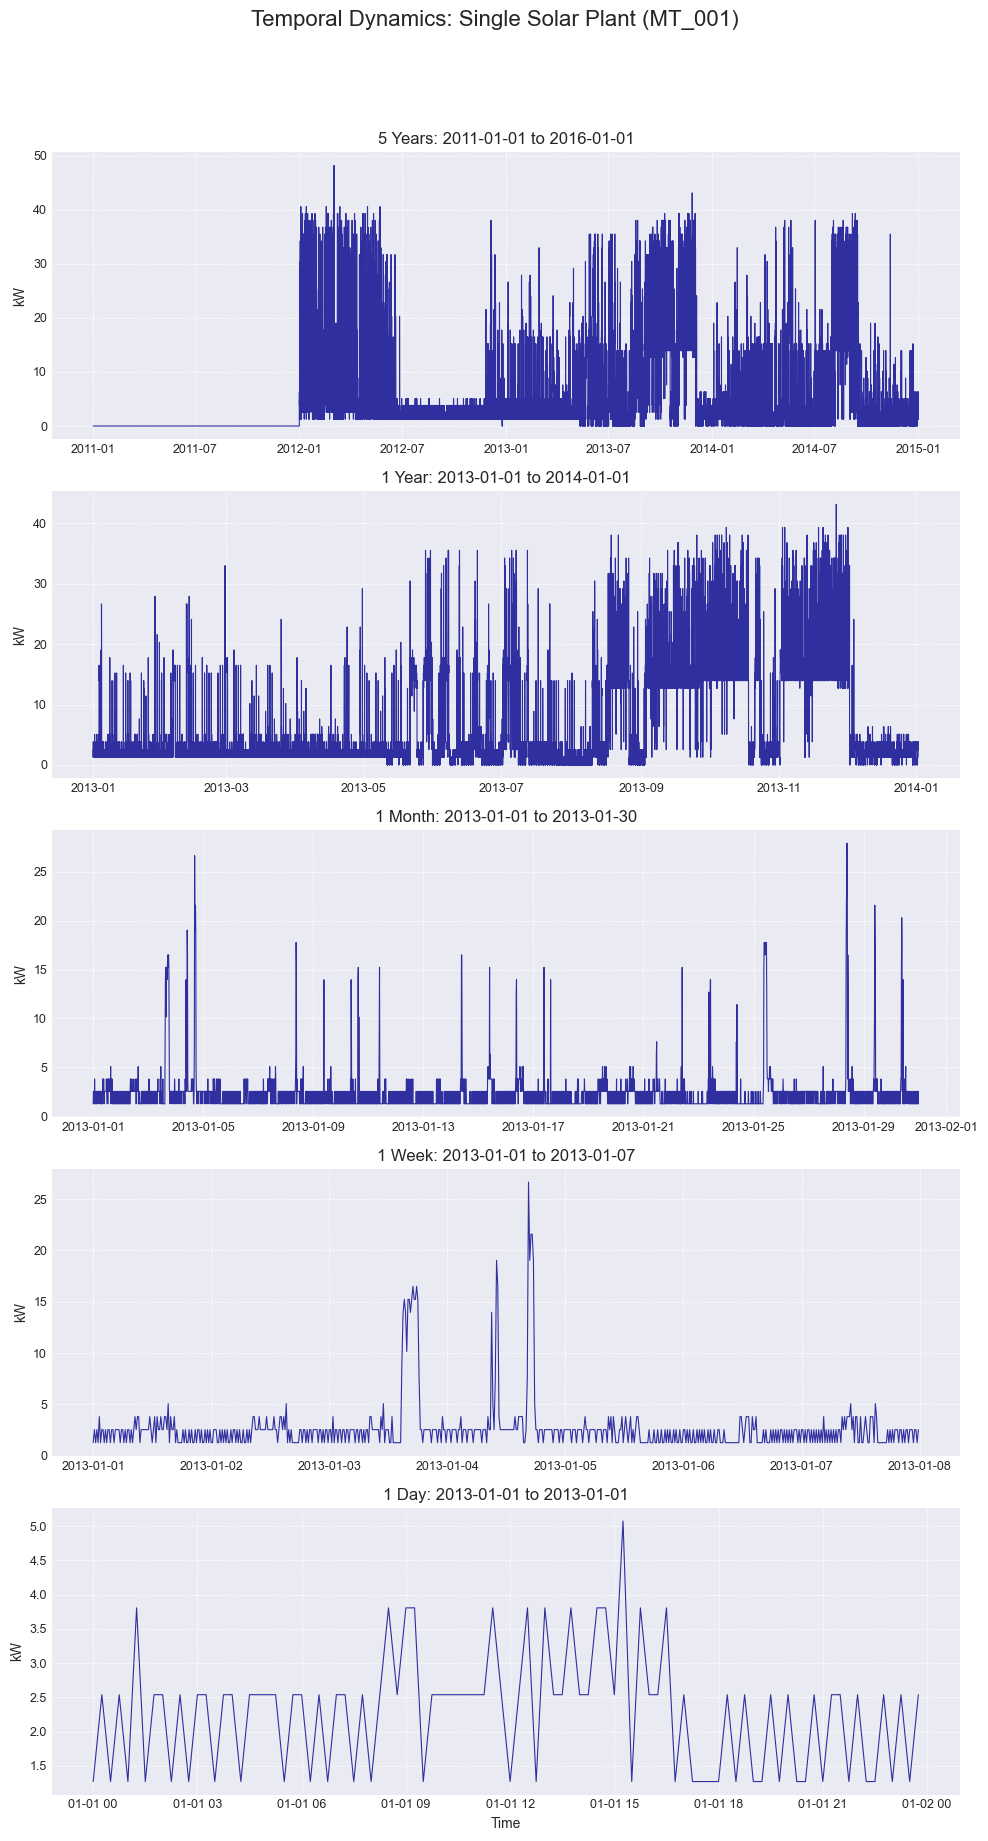

In [4]:
import matplotlib.pyplot as plt

# Time Windows
time_windows = [
    ('2011-01-01', '2016-01-01', '5 Years'),
    ('2013-01-01', '2014-01-01', '1 Year'),
    ('2013-01-01', '2013-01-30', '1 Month'),
    ('2013-01-01', '2013-01-07', '1 Week'),
    ('2013-01-01', '2013-01-01', '1 Day')
]

# dataframes of different amounts of solar plants (1, 7, and all)
df_subset_single = df[['MT_001']]
df_subset_multi = df[['MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006', 'MT_007', 'MT_008']]
plant_columns = [col for col in df.columns if col.startswith('MT_')]
df_avg = pd.DataFrame(df[plant_columns].mean(axis=1), columns=['Average'])

#Single Solar Plant
plt.style.use('seaborn-darkgrid') 
fig, axs = plt.subplots(5, 1, figsize=(10, 18))
fig.suptitle("Temporal Dynamics: Single Solar Plant (MT_001)", fontsize=16, y=1.02)

for ax, (start, end, label) in zip(axs, time_windows):
    df_zoom = df_subset_single.loc[start:end]
    ax.plot(df_zoom.index, df_zoom['MT_001'], color='darkblue', alpha=0.8, linewidth=0.8)
    ax.set_title(f"{label}: {start} to {end}", fontsize=12)
    ax.set_ylabel("kW", fontsize=10)
    ax.tick_params(axis='both', labelsize=9)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_xlabel("")  

axs[-1].set_xlabel("Time", fontsize=10) 
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

The 5-year plot shows no solar power production in 2011. In the following years, there is no clear long-term pattern. Some periods show consistent energy output, while others drop to zero.

The 1-year plot of a single solar plant shows many sharp spikes and irregular values. There is no clear repeating pattern or trend over time, which makes it hard to interpret without further analysis.

In the 1-month plot (January 2013), most of the values are close to zero, with a few occasional spikes. This makes sense, as January is winter and sunlight is limited. However, even during this period, we don’t see a stable or consistent pattern in the raw data.

The 1-week plot shows several days with very low activity, followed by three sudden increases. This could be due to a few sunny days during the week, while the rest were cloudy or overcast.

The 1-day plot shows a rise in solar energy production around noon, which likely reflects the position of the sun during the day. This suggests a possible daily pattern, but more data from other plants would help confirm it. The presence of noise and sudden changes still needs to be better understood.




# Understand Variability 

Before making strong claims about how a system behaves, it’s important to check whether the data is affected by outside factors or noise. In real-world data, there are several common types of variability to consider:

**Measurement error**, which can happen due to sensor problems or inaccurate readings.

**Random walk**, where values slowly drift over time because of small, random changes that build up.

**Perturbations**, which are sudden changes caused by outside events, like bad weather or power grid issues.

Because complex systems like solar networks are open to outside influences, it’s important to consider these effects when analyzing the data.

The lack of activity in 2011 is expected and can be explained by the fact that many solar plants had not yet been built. They started producing and reporting energy in the following years. 

In the case of solar power production, several sources of variability can affect the data. Measurement errors may occur due to faulty or miscalibrated sensors, temporary signal loss, or data logging issues, leading to sudden spikes, drops, or missing values. These errors are often local to individual plants and may appear as sharp, short-term fluctuations in the data. Random walk behavior could emerge if small, random factors—such as gradual sensor drift, maintenance inconsistencies, or shading from nearby objects—accumulate over time, causing a slow and unpredictable shift in output that doesn’t return to a stable average. Perturbations, on the other hand, are external events that impact multiple plants at once. These might include widespread cloud cover, extreme weather conditions like storms or snow, or grid-level changes such as voltage drops or curtailment events where production is intentionally reduced. Recognizing and accounting for these types of variability is essential for interpreting patterns in solar energy data and identifying whether observed changes reflect true system dynamics or noise.

Comparing multiple solar power plants helps us better understand variability by revealing which patterns are local and which are system-wide. If only one plant shows a sudden change, it may be due to measurement error or local issues. However, if several plants show the same shift, it likely points to an external cause, such as weather.


C:\Users\welmo\AppData\Local\Temp\ipykernel_8488\3849205608.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


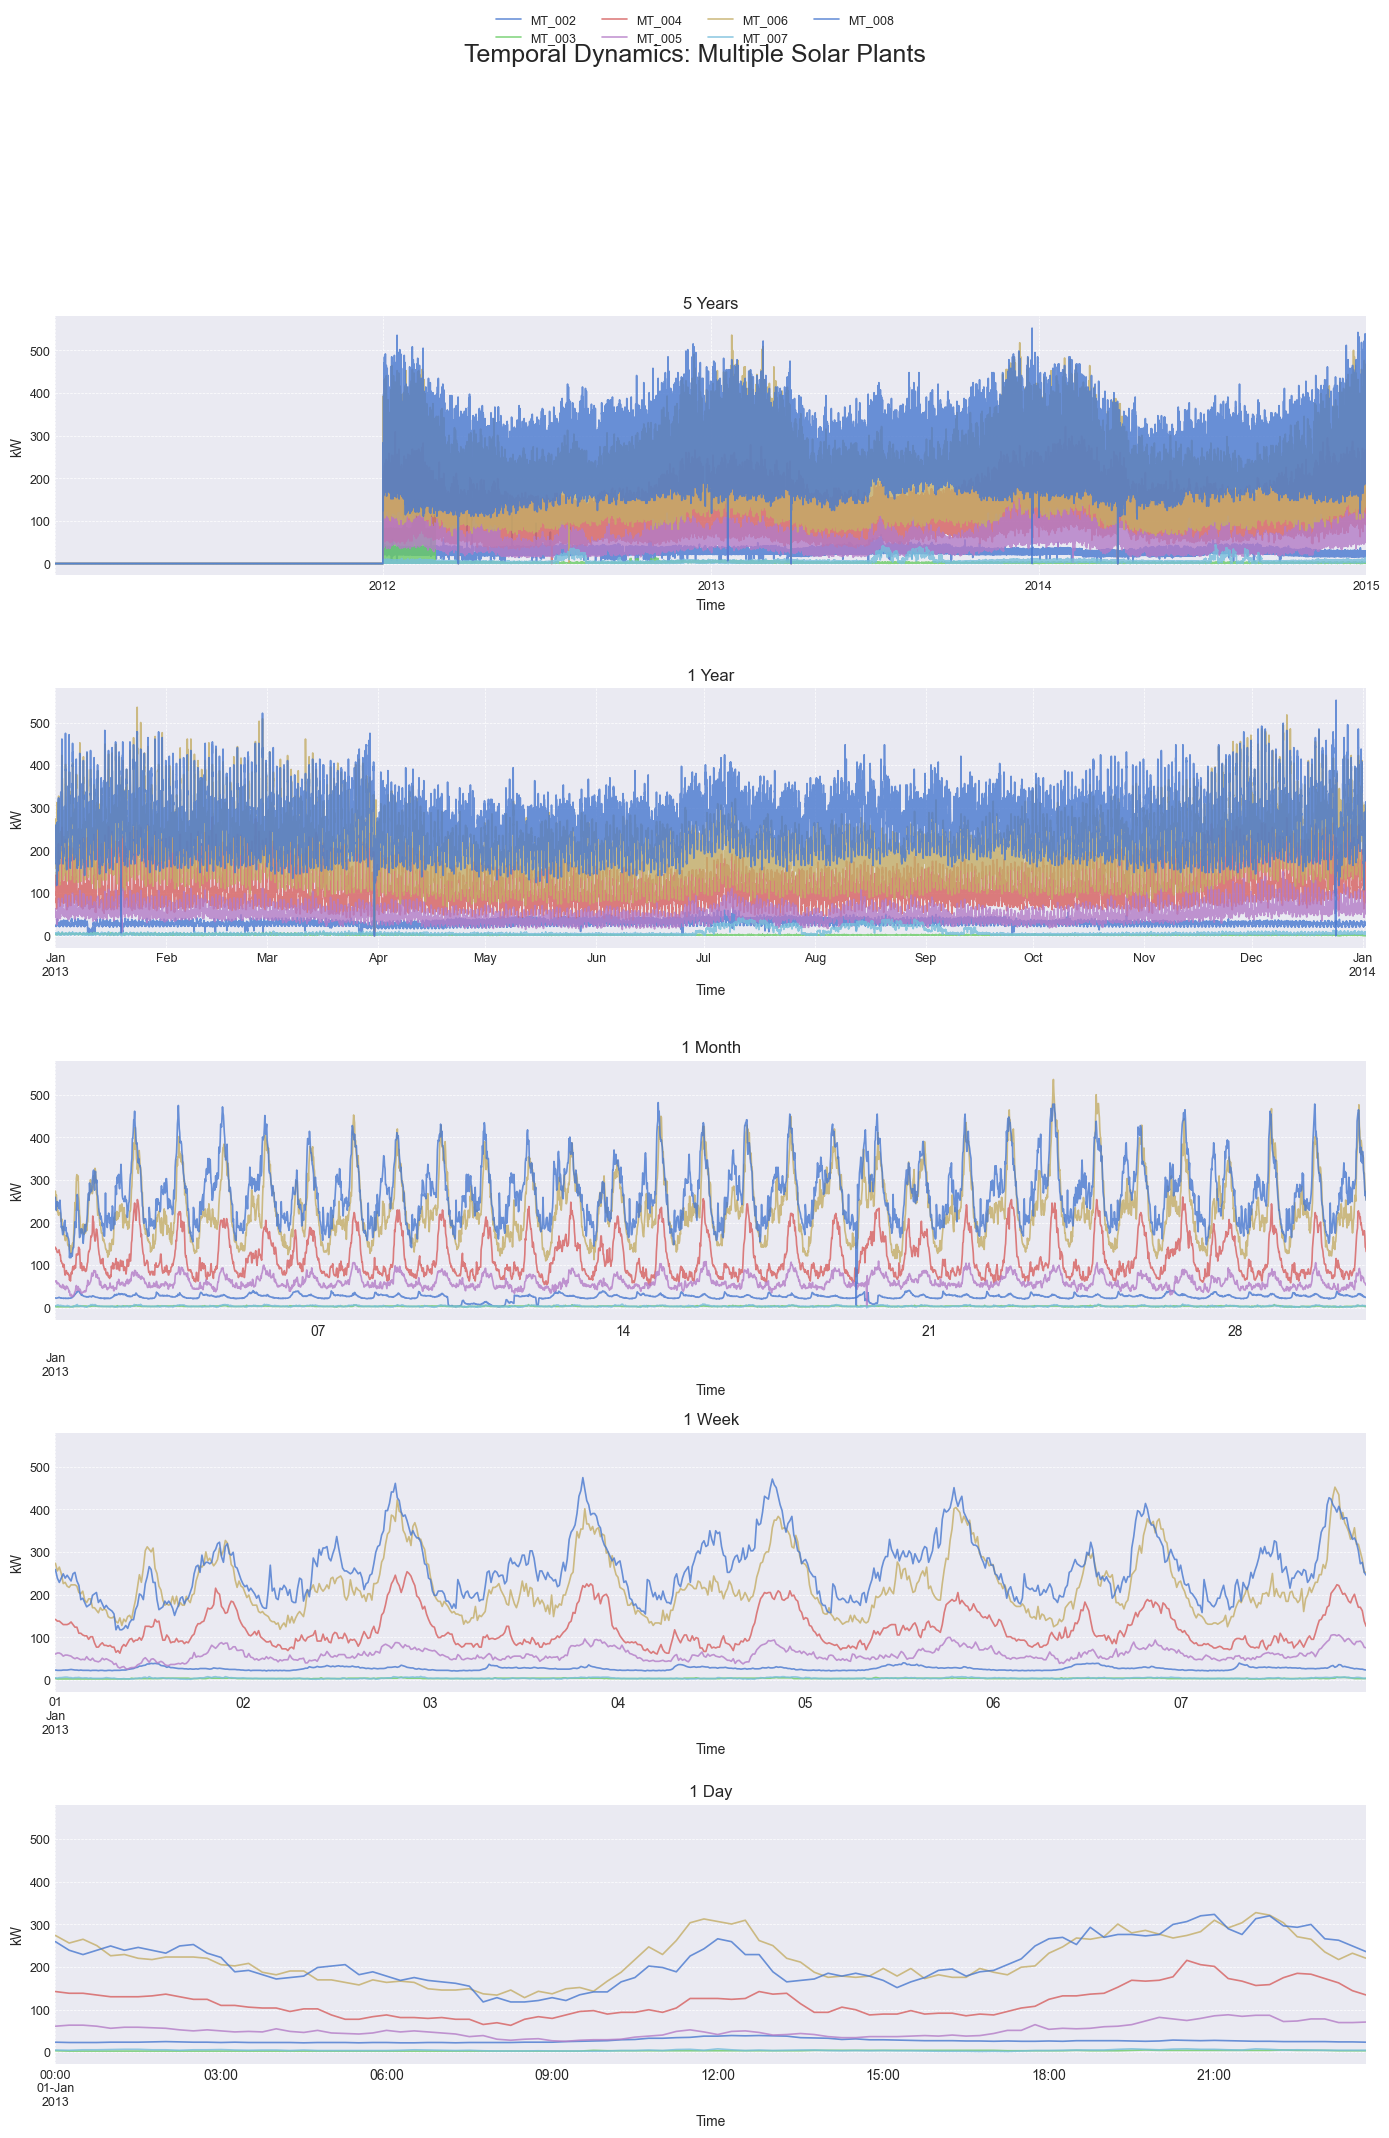

In [7]:
import numpy as np

# Multiple Solar Plants
plt.style.use('seaborn-muted')

fig, axs = plt.subplots(5, 1, figsize=(14, 20), sharey=True)
fig.suptitle("Temporal Dynamics: Multiple Solar Plants", fontsize=18, y=1.05)

colors = plt.cm.viridis(np.linspace(0, 1, df_subset_multi.shape[1]))

for ax, (start, end, label) in zip(axs, time_windows):
    df_zoom = df_subset_multi.loc[start:end]
    df_zoom.plot(ax=ax, legend=False, linewidth=1.2, alpha=0.8)
    ax.set_title(label, fontsize=12)
    ax.set_xlabel("Time", fontsize=10)
    ax.set_ylabel("kW", fontsize=10)
    ax.tick_params(axis='both', labelsize=9)
    ax.grid(True, linestyle='--', linewidth=0.5)

axs[-1].set_xlabel("Time", fontsize=10)    
    
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=9, bbox_to_anchor=(0.5, 1.07))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



The 5-year plot displays no energy production in the first year due to the fact that the solar plants were not built yet. In the 1-year plot, the overlap of multiple power plants creates a dense and cluttered visualization, making it difficult to identify specific patterns. However, one plant—MT_008—stands out, due to significantly higher energy production. This deviation may be related to the location or setup of that particular plant. In the 1-month plot, the overlapping curves begin to show a more distinct pattern. With around 30 peaks, it suggests the presence of a daily cycle, where more solar energy is produced during the day than at night. This pattern becomes even clearer in the 1-week plot, which shows seven distinct peaks, likely representing daily sunlight patterns. However, the 1-day plot reveals an unexpected result: while there is a clear peak around noon—as expected due to the sun's highest position—there is also a second, smaller peak in the evening. This is less intuitive and could be caused by local environmental conditions, and pertubations. Further comparison across other plants would be useful to confirm whether this is a recurring phenomenon. 


C:\Users\welmo\AppData\Local\Temp\ipykernel_8488\1510995668.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


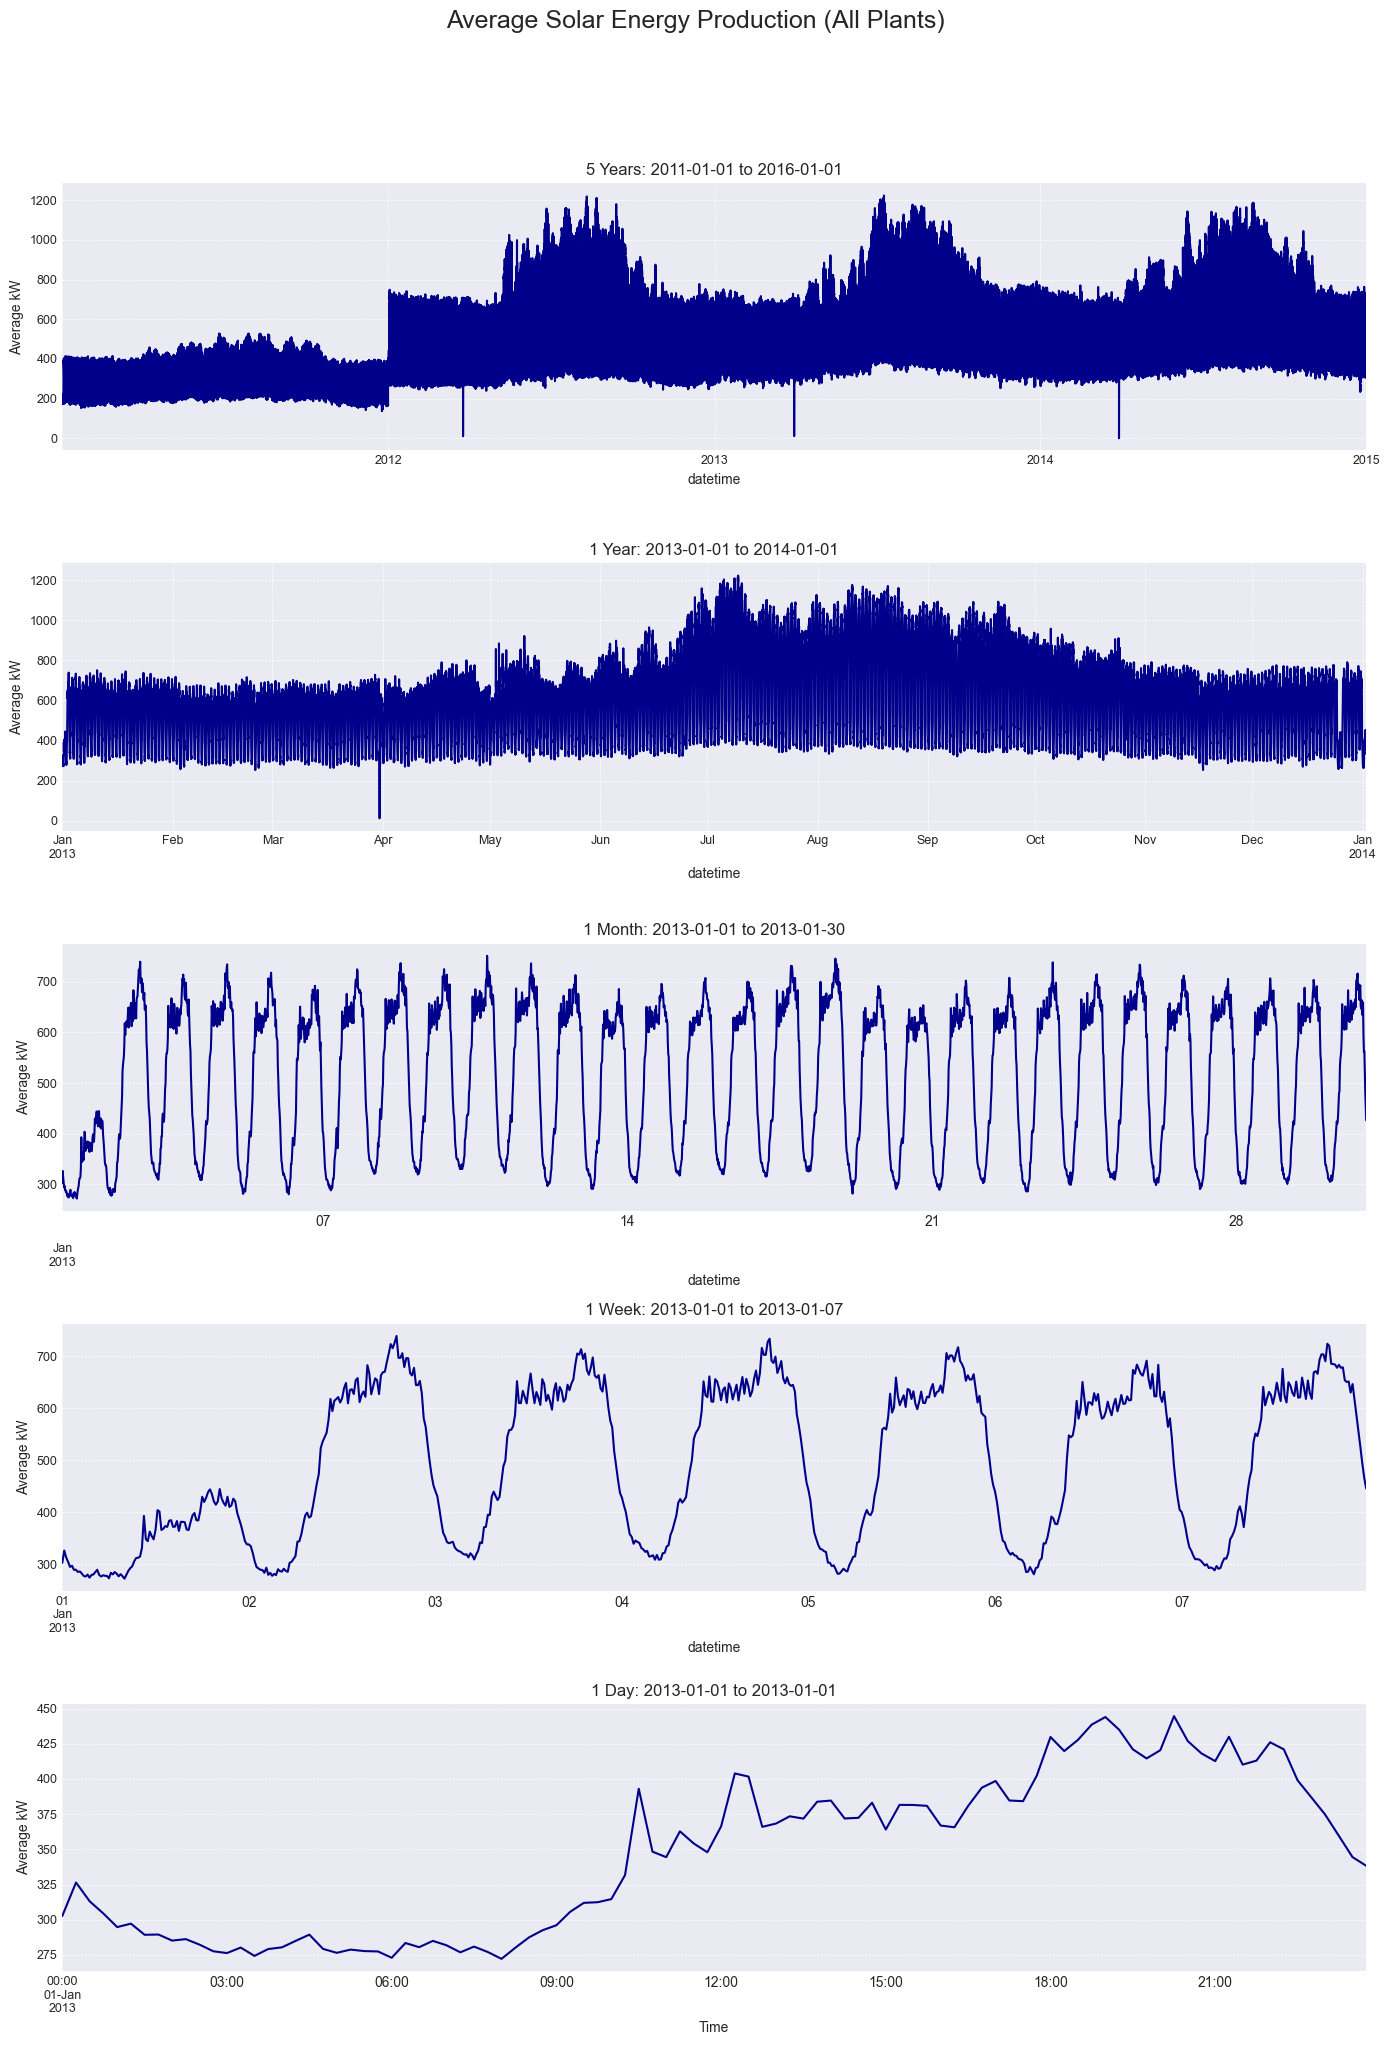

In [10]:
# Average of All Plants
plt.style.use('seaborn-darkgrid')

# Create vertical subplot layout
fig, axs = plt.subplots(5, 1, figsize=(14, 20), sharex=False)
fig.suptitle("Average Solar Energy Production (All Plants)", fontsize=18, y=1.02)

for ax, (start, end, label) in zip(axs, time_windows):
    df_zoom = df_avg.loc[start:end]
    df_zoom.plot(ax=ax, color='darkblue', linewidth=1.5, legend=False)
    ax.set_title(f"{label}: {start} to {end}", fontsize=12)
    ax.set_ylabel("Average kW", fontsize=10)
    ax.tick_params(axis='both', labelsize=9)
    ax.grid(True, linestyle='--', linewidth=0.5)

axs[-1].set_xlabel("Time", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Looking at the 5-year average plot, a clear seasonal pattern emerges, with higher production during the summer months and lower output in the winter. This repeating trend strongly suggests a second-order temporal signature, reflecting oscillatory behavior linked to the annual solar cycle. Notably, there appears to be a recurring drop in production around early April across multiple years. Since this pattern is repeated consistently, it may reflect a systematic issue or perturbations, due to the daylight saving tim transition.

In the 1-year plot, this seasonal cycle is more pronounced, with peak production from June to August, and the same sharp drop in April. The 1-month plot shows roughly 30 regular spikes, aligning with the day-night cycle, and reinforcing the presence of a strong daily rhythm. This becomes even clearer in the 1-week plot, which displays seven nearly identical daily peaks — another indication of second-order periodicity.

Finally, the 1-day plot shows an increase in solar energy starting in the morning and continuing into the evening. However, the sustained production until around 8 PM in January seems unusual, as the sun typically sets earlier. This may reflect sensor delay, reflected light, or slight misalignment in the data timestamps.


# Stationarity and Multistability
After observing a  temporal patterns, we can say something about the stability and change. If we say a system has **stationarity**, it's behavior stays consistent over time (mean, variance, etc). For example, the metronome. If we say a system is **non-stationary**, it's behavior changes over time. Take a heartbreat during excercise and rest, it can even switch between different types of dynamics or changes of order. **Multistability** means a system has multiple stable states, and may change between them depending on certain conditions. 


Now we are almost certain about the presence patterns, lets test this hypothessis by testing for stationarity


## Stationarity

To assess whether the solar energy production data from a single plant (MT_001) is stationary, we applied the Augmented Dickey-Fuller (ADF) test. This statistical test helps determine if a time series has a consistent mean and variance over time, which is important for identifying stable patterns and for further modeling. The test returns a p-value, an ADF statistic, and critical values at different confidence levels. If the p-value is below 0.05, we reject the null hypothesis and conclude that the series is likely stationary. A strongly negative ADF statistic, especially one lower than the critical value at the 1% or 5% level, further supports this. In our case, the ADF test helps distinguish between true long-term trends in solar production and random fluctuations or drift. This is a crucial step in identifying the nature of the temporal signature present in the data and understanding whether patterns are cyclical, emergent, or simply the result of non-stationary noise.

In our analysis, we applied the ADF test to eight power plants. For the first plant (MT_001), we display the full test statistics, including the ADF statistic, p-value, lag count, number of observations, and critical values. For the remaining plants (MT_002 to MT_008), we summarize the results by reporting whether the series is stationary based on the p-value.

In [9]:
from statsmodels.tsa.stattools import adfuller

df_subset_multi = df[['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006', 'MT_007', 'MT_008']]

print("ADF Test Results:\n")

for i, col in enumerate(df_subset_multi.columns):
    series = df_subset_multi[col].dropna()
    result = adfuller(series)

    if i == 0:
        print(f"--- {col} ---")
        print(f"ADF Statistic: {result[0]}")
        print(f"p-value: {result[1]}")
        print(f"Lags used: {result[2]}")
        print(f"Observations: {result[3]}")
        print("Critical values:")
        for key, value in result[4].items():
            print(f"  {key}: {value}")
        if result[1] < 0.05:
            print("Stationary")
        else:
            print("Non-stationary")
    else:
        status = "Stationary" if result[1] < 0.05 else "Non-stationary\n"
        print(f"{col}: {status}")


ADF Test Results:

--- MT_001 ---
ADF Statistic: -9.92583416403414
p-value: 2.908749627232857e-17
Lags used: 74
Observations: 140181
Critical values:
  1%: -3.4303966498295004
  5%: -2.861560618558905
  10%: -2.5667809745260652
Stationary
MT_002: Stationary
MT_003: Stationary
MT_004: Stationary
MT_005: Stationary
MT_006: Stationary
MT_007: Stationary
MT_008: Stationary


For the first plant (MT_001), the ADF statistic is approximately -9.93, which is well below all three critical values, particularly the 1% level. The corresponding p-value is an extremely small 2.91 × 10⁻¹⁷, which provides strong statistical evidence against the null hypothesis. This confirms that the time series is stationary, indicating stable long-term behavior in solar energy production for that plant.

We then extended the test to seven additional solar plants. Although we do not display the full test output for each, the p-values for all were below the 0.05 threshold. Each series was therefore determined to be stationary, as summarized above.

This consistent result across multiple power plants suggests a broader pattern: the solar energy production in this dataset is not subject to long-term trends or stochastic drift, but instead displays stable, recurring patterns. These findings align with our earlier observations of daily and seasonal cycles, and they support the classification of **second-order**  temporal signatures—oscillatory behaviors that are likely tied to environmental regularities such as day/night cycles and seasonal solar 
light transmission.
It gives us confidence that observed variations in the data are largely cyclical or short-term perturbations rather than evolving trends or random walk behavior.

# Conclusion

Through a detailed analysis of temporal patterns in solar energy production across multiple photovoltaic plants in Alabama, we explored how the system evolves over time and whether it exhibits emergent behaviors consistent with solar cycles. Our investigation centered on three main questions: identifying the **order of change** in the data, assessing its **stationarity**, and accounting for **variability** due to external or random influences.

## **Order of Change and Temporal Signatures**

The hypothesis proposed that solar energy production would follow a predictable **daily** and **seasonal** pattern, reflecting the sun’s natural cycle. Our results strongly support this. The 1-day plots showed a clear diurnal rhythm—production increases after sunrise, peaks near noon, and declines toward sunset. This regular fluctuation repeated across the dataset, affirming the presence of a **second-order temporal signature**, characterized by oscillatory behavior with relatively stable periodicity.

On a broader time scale, the averaged data over weeks, months, and years revealed a seasonal trend, with significantly higher production during summer months and lower output during winter—further reinforcing this classification. In contrast, there was no evidence of linear trends or chaotic fluctuations, which would have indicated first-order or third-order signatures, respectively.

Thus, we suspect that the solar power system demonstrates a second-order change that arise from the interaction with predictable, cyclical environmental inputs.

## **Stationarity of the Dataset**

To confirm the stability of these recurring patterns, we applied the Augmented Dickey-Fuller (ADF) test across multiple power plants. All tested time series returned p-values well below 0.05, and the ADF statistics were significantly lower than the critical thresholds, indicating **stationarity**. This suggests that the statistical properties of the solar production data—mean, variance, and autocorrelation—remained consistent. The stationarity supports the conclusion that the observed oscillations are not due to random drift or long-term shifts, but rather reflect cyclical dynamics, which are day-night and seasonal solar energy.

## **Accounting for Variability**

Our analysis also considered different types of **variability** common in real-world systems: **Measurement error** was evident in some sharp spikes and sudden drops, likely due to faulty sensors or logging interruptions. **Random walk behavior** was not prominent in the dataset, especially given the strong stationarity results.**Perturbations**, such as simultaneous anomalies across several plants which were observed each year in early April,

---

## Final Reflection

In summary, the Alabama solar power dataset demonstrates consistent second-order temporal signatures, the behavior largely results from predictable external inputs rather than internal, nonlinear interactions typical of complex adaptive systems. Thus, while methods from complexity science are applicable, the degree of emergent behavior is limited. 
The production data is **stationary**, meaning that these patterns are consistent and repeatable over time. Finally, while variability is present—as expected in a real-world open system—it does not obscure the core temporal structure. These findings not only validate our initial hypothesis but also highlight how complex system analysis can reveal the underlying regularities within seemingly noisy, high-dimensional datasets.

# References

Lecture notes from the lecture Temporal Dynamics and change

Box, G. E. P., Jenkins, G. M., Reinsel, G. C., & Ljung, G. M. (2008). Time series analysis: Forecasting and control (4th ed.). Wiley.

Holland, J. H. (1998). Emergence: From chaos to order. Oxford University Press.
(Note: Originally 1992, but the commonly cited edition is from 1998.)

Mitchell, M. (2009). Complexity: A guided tour. Oxford University Press.

De Domenico, M. (n.d.). Complexity explained. Retrieved from https://complexityexplained.github.io/

Butner, J. (2018). Quantitative reasoning under a dynamical social science. In Lecture notes, Chapter 2 – Time Evolution.